# 요약

* 적분값(sum), peak수, peak 위치만을 label로 설정하여 시도해봄
* 컨볼루션 없이 Dense 레이어만으로 학습
* peak 위치는 못 맞추지만, 적분값과 peak수는 잘 맞춘다! -> 추후 라벨로 활용가능할 듯!

In [0]:
# Library import
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
N = 5  # Maximum number of possible peak
Data_size = 300000  

Parameters = np.zeros((Data_size, N, 2))  # Set of Parameters ready
print(Parameters.shape[1])

5


In [0]:
# Lorentzian function that returns sum of multi-Lorentzian function with two arguments
def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] ** 2 / ((x - a[i])**2 + b[i]**2)
    return result 
    # noise = -0.2 ~ 0.2 

In [4]:
# X domain fixed
x = np.arange(-2, 2, 0.01)
print(len(x))

400


In [5]:
for i in range(len(Parameters)): # For each matrix in Parameter set...

    for j in range(Parameters.shape[1]): # For each raw in each matrix...
        
        # append two argument that will be used in Lorentzian function
        # Second parameter is constrained in range from 0.1 to 0.2
        Parameters[i][j] = np.array([[np.random.rand(), 0.1*np.random.rand() + 0.1]])
    
# Check out
print(Parameters)

[[[1.28760051e-02 1.08907825e-01]
  [7.06159086e-01 1.48107343e-01]
  [2.42184190e-01 1.84466511e-01]
  [5.17064881e-01 1.47934798e-01]
  [2.16418541e-01 1.00271901e-01]]

 [[6.94379207e-01 1.09954873e-01]
  [1.77765343e-03 1.20129959e-01]
  [3.40497170e-01 1.29368536e-01]
  [3.58825610e-01 1.69419080e-01]
  [6.81043643e-01 1.29436852e-01]]

 [[4.59163428e-02 1.62970039e-01]
  [6.04197519e-01 1.22643360e-01]
  [3.20437383e-01 1.45980510e-01]
  [7.51752364e-01 1.94219865e-01]
  [3.62245174e-01 1.36299399e-01]]

 ...

 [[2.17684723e-01 1.64357641e-01]
  [2.13961583e-01 1.42852691e-01]
  [5.14373801e-01 1.47992372e-01]
  [6.48875127e-01 1.49842289e-01]
  [9.60239156e-01 1.96115041e-01]]

 [[7.79910457e-02 1.23530395e-01]
  [7.06373091e-01 1.39008341e-01]
  [8.68320575e-01 1.79405361e-01]
  [2.58267255e-01 1.03514018e-01]
  [1.15009444e-01 1.14669894e-01]]

 [[8.73112585e-01 1.08272355e-01]
  [9.53536816e-02 1.54475881e-01]
  [9.09043619e-01 1.86911958e-01]
  [9.82493646e-01 1.37854023e-01

In [0]:
# ================== Data Generating ================
Data_x = []
Data_y = []

for j in Parameters:  # For each parameter matrix...

    peak = random.randint(2, N) # Random selection of Possible peak number
    j = list(j.reshape((2*N,))) # reshape processing to put it as *args in function, Since j is matrix

    # 적분값(sum), peak 수, peak 위치만을 라벨로 설정!
    if peak == 1:
        Data_x.append(Lorentzian(x, *j[0:2]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:2])), peak, j[0], 0, 0, 0, 0]))

    elif peak == 2:
        Data_x.append(Lorentzian(x, *j[0:4]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:4])), peak, j[0], j[2], 0, 0, 0 ]))

    elif peak == 3:
        Data_x.append(Lorentzian(x, *j[0:6]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:6])) ,peak, j[0], j[2], j[4], 0, 0 ]))

    elif peak == 4:
        Data_x.append(Lorentzian(x, *j[0:8]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:8])), peak, j[0], j[2], j[4], j[6], 0 ]))

    elif peak == 5:
        Data_x.append(Lorentzian(x, *j[0:]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:])), peak, j[0], j[2], j[4], j[6], j[8] ]))



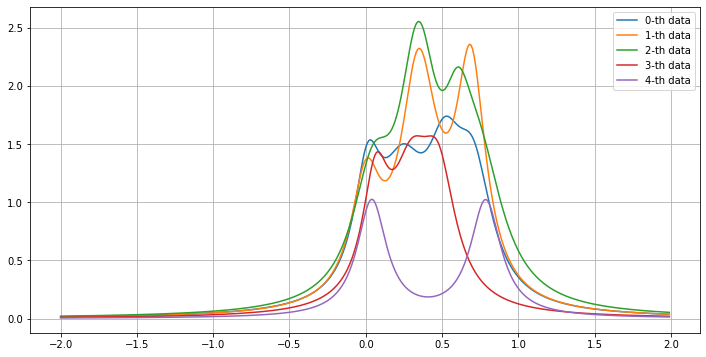

In [7]:
# Generated Data sample check!
plt.figure(figsize=(12, 6))

for i in range(5):
    plt.plot(x, Data_x[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid('on')

In [8]:
for i in range(20):
    print(sum(Data_x[i]), len(list(filter(lambda x:x > 0, Data_y[i]))) /2)

175.69517524661057 3.0
197.4208237811895 3.5
226.63893310486978 3.5
120.97392739286616 2.5
71.96252192741886 2.0
85.68899327845865 2.0
133.97110477112525 2.5
248.25462909114373 3.5
220.41983306424143 3.5
116.81254231170779 2.5
135.39642097362338 2.5
91.26217407404249 2.0
128.21291767273738 2.5
202.2756195251235 3.5
113.38573881715614 2.5
152.7924253522558 3.0
225.36790473874765 3.5
128.49620132210325 2.5
158.73678005607786 3.0
142.51047230475442 2.5


In [0]:
# Data spliting up into three group : training/validation/test

train_data = np.array(Data_x[:150000])
val_data = np.array(Data_x[150000:250000])
test_data = np.array(Data_x[250000:])

train_labels = np.array(Data_y[:150000])
val_labels = np.array(Data_y[150000:250000])
test_labels = np.array(Data_y[250000:])

In [10]:
# size test

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(150000, 400) (150000, 7)
(100000, 400) (100000, 7)
(50000, 400) (50000, 7)


In [11]:
# From Here on, let`s start to make Convolution Neural Network!

# Library import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Modeling
model2 = Sequential()

# Fully-Connected Layers
model2.add(Dense(200, activation = 'relu', input_shape=(400,)))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(7, activation = 'linear'))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               80200     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 707       
Total params: 101,007
Trainable params: 101,007
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Training Method setting for Regression
model2.compile(loss='mse', metrics=['mae'], optimizer=Adam())

In [13]:
# Training Start!
%%time
hist2 = model2.fit(train_data, train_labels, 
                   epochs=40, 
                   batch_size=1000,
                   validation_data=(val_data, val_labels), verbose=2)

Epoch 1/40
150/150 - 1s - loss: 430.3805 - mae: 4.7917 - val_loss: 0.1795 - val_mae: 0.3199
Epoch 2/40
150/150 - 1s - loss: 0.1418 - mae: 0.2925 - val_loss: 0.1190 - val_mae: 0.2712
Epoch 3/40
150/150 - 1s - loss: 0.1079 - mae: 0.2613 - val_loss: 0.1002 - val_mae: 0.2545
Epoch 4/40
150/150 - 1s - loss: 0.0951 - mae: 0.2469 - val_loss: 0.0923 - val_mae: 0.2460
Epoch 5/40
150/150 - 1s - loss: 0.0867 - mae: 0.2361 - val_loss: 0.0829 - val_mae: 0.2305
Epoch 6/40
150/150 - 1s - loss: 0.0795 - mae: 0.2259 - val_loss: 0.0761 - val_mae: 0.2204
Epoch 7/40
150/150 - 1s - loss: 0.0707 - mae: 0.2112 - val_loss: 0.0659 - val_mae: 0.1992
Epoch 8/40
150/150 - 1s - loss: 0.0620 - mae: 0.1920 - val_loss: 0.0604 - val_mae: 0.1865
Epoch 9/40
150/150 - 1s - loss: 0.0589 - mae: 0.1841 - val_loss: 0.0587 - val_mae: 0.1822
Epoch 10/40
150/150 - 1s - loss: 0.0578 - mae: 0.1819 - val_loss: 0.0571 - val_mae: 0.1806
Epoch 11/40
150/150 - 1s - loss: 0.0568 - mae: 0.1800 - val_loss: 0.0574 - val_mae: 0.1815
Epoch 

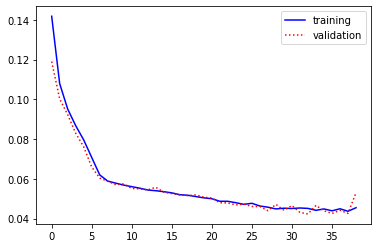

In [14]:
# Plotting loss graph

plt.plot(hist2.history['loss'][1:], 'b-', label="training")
plt.plot(hist2.history['val_loss'][1:], 'r:', label="validation")
plt.legend()
plt.show()

In [15]:
# Prediction

predict = model2.predict(test_data)
print(predict)

[[ 1.7562236e+02  4.0423841e+00  6.3837451e-01 ...  7.8030431e-01
   5.0262165e-01  3.9307418e-01]
 [ 8.1368164e+01  1.9767604e+00  3.6722440e-01 ...  1.6404977e-01
  -7.3141575e-02 -4.6056680e-02]
 [ 1.3021767e+02  3.0260036e+00  3.1955191e-01 ...  3.6408457e-01
   1.5344980e-01  7.1011804e-02]
 ...
 [ 1.8039064e+02  4.0762606e+00  1.6767485e-01 ...  4.8643455e-01
   3.1466278e-01  2.1420956e-01]
 [ 7.8729538e+01  2.0508430e+00  3.3216724e-01 ...  1.5026569e-01
  -9.3540847e-02 -6.5661617e-02]
 [ 1.7381792e+02  3.9906518e+00  5.1515603e-01 ...  7.1531284e-01
   4.5980540e-01  3.3416876e-01]]


In [16]:
predict[2].shape

(7,)

In [17]:
plt.figure(figsize=(12, 8))
for i in range(20):
    #plt.plot(x, test_data[i], label=str(i)+'-th data')
    #plt.legend()
    #print(predict[i][0], predict[i][1])
    #print(test_labels[i][0], test_labels[i][1])
    print(predict[i])
    print(test_labels[i])
    print('======')

[175.62236      4.042384     0.6383745    1.0282915    0.7803043
   0.50262165   0.39307418]
[175.63482061   4.           0.76858527   0.99625955   0.92994395
   0.5106102    0.        ]
[ 8.1368164e+01  1.9767604e+00  3.6722440e-01  5.5790359e-01
  1.6404977e-01 -7.3141575e-02 -4.6056680e-02]
[81.39199952  2.          0.34643845  0.57558483  0.          0.
  0.        ]
[1.3021767e+02 3.0260036e+00 3.1955191e-01 6.2598634e-01 3.6408457e-01
 1.5344980e-01 7.1011804e-02]
[130.24161828   3.           0.20744151   0.46292825   0.74427091
   0.           0.        ]
[229.62798      5.019311     0.29042634   0.8226613    0.7817519
   0.58901846   0.40154207]
[2.29678838e+02 5.00000000e+00 7.45747911e-01 2.41364755e-01
 8.69902769e-01 5.08756674e-01 2.19819099e-01]
[237.41743      5.031934     0.71365035   1.1801568    1.0255612
   0.7566353    0.5546562 ]
[237.4707903    5.           0.8236564    0.95715999   0.8027168
   0.60016108   0.82777859]
[258.62427      4.9535847    0.32343096   0.

<Figure size 864x576 with 0 Axes>